Accuracy of Decision Tree: 0.83


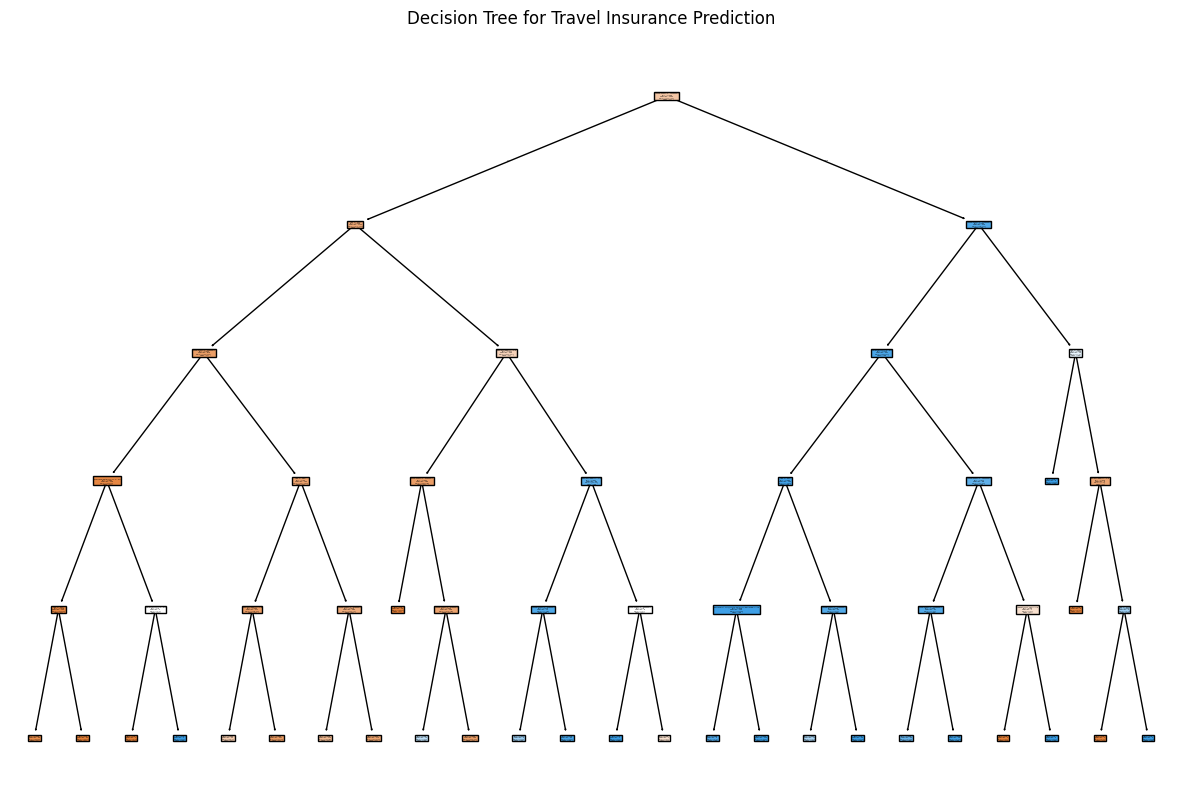

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#Load dataset
file_path = '/content/TravelInsurancePrediction.csv'
data = pd.read_csv(file_path)

#Preprocess the dataset
#Drop unnecessary columns
data_cleaned = data.drop(columns=['Unnamed: 0'])

#Convert categorical columns to numeric using one-hot encoding
categorical_columns = ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

#Define features (X) and target (y)
X = data_encoded.drop(columns=['TravelInsurance'])
y = data_encoded['TravelInsurance']

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#STrain a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42, max_depth=5)  #Limit depth to prevent overfitting
tree.fit(X_train, y_train)

#Predict on the test set
y_pred = tree.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree: {accuracy:.2f}")

#Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree for Travel Insurance Prediction")
plt.show()


**BELOW IS REFINED VISUALIZATION OF THE SAME TREE**

**Reading the Decision Tree:**

example:
gini = 0.5
samples = 1390
value = [902,488]
class = No

Gini Impurity:

Perfect Purity = 0, ideal scenario for a node

Maximum Impurity = 0.5, this is when node is perfectly mixed, 50% yes 50% no, indicates the node provides no useful
information for classification


Gini: 0.5 (Max impurity, meaning samples are split)

Samples: 1390 samples in this node

Value: 902 samples are NO, 488 samples are YES

Class: The predicted class is NO because its the majority

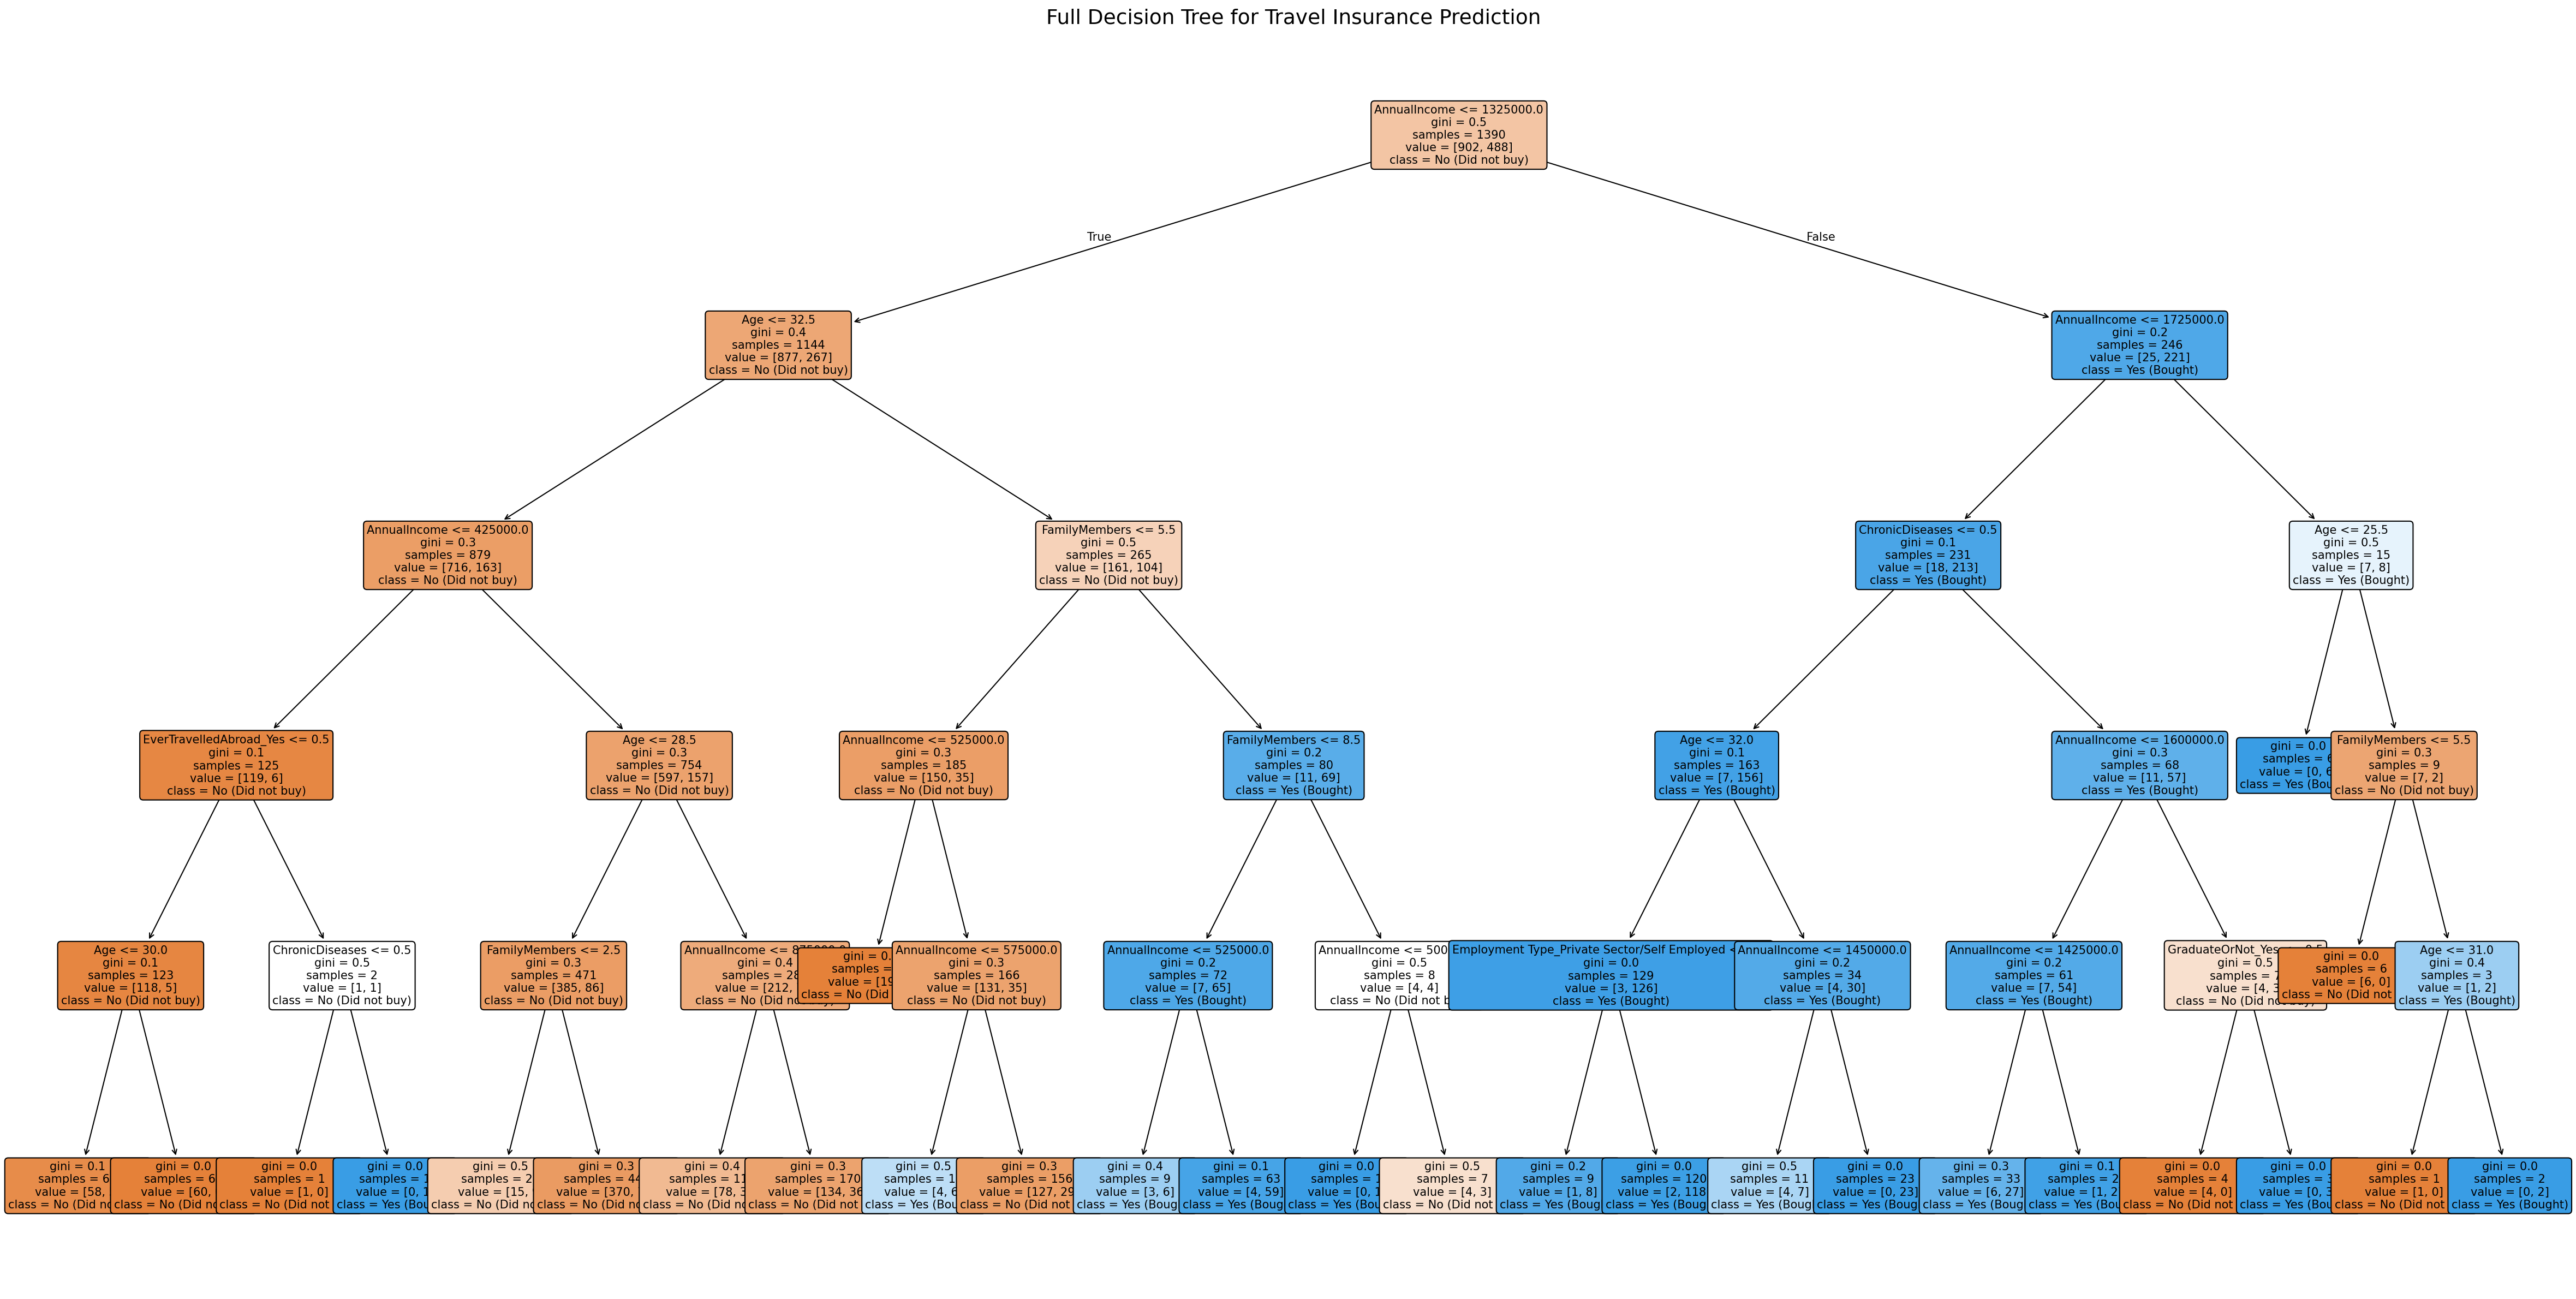

In [5]:
plt.figure(figsize=(40, 20), dpi=150)  #Increase figure size and resolution
plot_tree(
    tree,
    feature_names=X.columns,  #Feature names
    class_names=["No (Did not buy)", "Yes (Bought)"],  #Class labels
    filled=True,  #Color the nodes
    rounded=True,  #Rounded corners
    precision=1,  #Reduce decimals in thresholds
    fontsize=10  #Adjust font size for readability
)
plt.title("Full Decision Tree for Travel Insurance Prediction", fontsize=18)
plt.show()


In [6]:
from sklearn.metrics import f1_score

# Assuming y_test (true labels) and y_pred (predicted labels) are already defined
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1:.2f}")


F1 Score: 0.72


F Score of 0.72 means decision tree is moderately good at avoiding false positives and false negatives


The profile created from decision Tree for who is liekly to purchase is:

Older than 32.5 years
Has an income above 1.7 million rupees
Has fewer than 5.5 family members
has no Chronic Disease
